In [41]:
import pandas as pd
import numpy as np

## Pandas es como una hoja de cálculo avanzada

Se instala con `pip install pandas`

Pandas es una librería de Python que nos permite trabajar con datos tabulares de forma muy sencilla. Es una librería muy potente y muy utilizada en el mundo de la ciencia de datos.

Pandas nos permite leer datos de distintos formatos, como CSV, JSON, Excel, etc. También nos permite escribir datos en distintos formatos.

Pandas nos permite manipular los datos de forma muy sencilla, como si estuviéramos trabajando con una hoja de cálculo.

Pandas nos permite hacer análisis estadísticos de los datos.

Pandas nos permite guardar los datos en distintos formatos.

### Dataframes

Un dataframe es una estructura de datos que se parece a una tabla de una hoja de cálculo. Cada fila de la tabla es un registro y cada columna es una variable.

Se pueden crear dataframes con datos de distintos tipos: números, cadenas de texto, fechas, etc.

### Crear un dataframe

Para crear un dataframe podemos usar la función `pd.DataFrame()`.

Por ejemplo, para crear un dataframe con los datos de la tabla siguiente:

In [42]:
personas = pd.DataFrame([{"Nombre":"Ana", "Edad":25, "Ciudad": "Madrid"}, {"Nombre":"Juan", "Edad":30, "Ciudad": "Barcelona"}])
personas

,Nombre,Edad,Ciudad
0,Ana,25,Madrid
1,Juan,30,Barcelona


Para añadir un índice a las filas podemos usar el parámetro `index`.

In [43]:
personas = pd.DataFrame([{"Nombre":"Ana", "Edad":25, "Ciudad": "Madrid"}, {"Nombre":"Juan", "Edad":30, "Ciudad": "Barcelona"}], index=["Persona 1", "Persona 2"])
personas

,Nombre,Edad,Ciudad
Persona 1,Ana,25,Madrid
Persona 2,Juan,30,Barcelona


Se pueden añadir columnas a un dataframe con el operador `[]`.

In [44]:
personas["Hijos"] = [0, 2]
personas

,Nombre,Edad,Ciudad,Hijos
Persona 1,Ana,25,Madrid,0
Persona 2,Juan,30,Barcelona,2


Con `df.merge()` podemos unir dos dataframes.

In [45]:
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR'},
                         {'Name': 'Sally', 'Role': 'Course liasion'},
                         {'Name': 'James', 'Role': 'Grader'}])
staff_df = staff_df.set_index('Name')
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business'},
                           {'Name': 'Mike', 'School': 'Law'},
                           {'Name': 'Sally', 'School': 'Engineering'}])
student_df = student_df.set_index('Name')
student_df

,School
Name,
James,Business
Mike,Law
Sally,Engineering


In [46]:
pd.merge(staff_df, student_df, how='outer', left_index=True, right_index=True)

,Role,School
Name,,
James,Grader,Business
Kelly,Director of HR,NaN
Mike,NaN,Law
Sally,Course liasion,Engineering


In [47]:
pd.merge(staff_df, student_df, how='inner', left_index=True, right_index=True)

,Role,School
Name,,
Sally,Course liasion,Engineering
James,Grader,Business


In [48]:
pd.merge(staff_df, student_df, how='left', left_index=True, right_index=True)

,Role,School
Name,,
Kelly,Director of HR,NaN
Sally,Course liasion,Engineering
James,Grader,Business


In [49]:
pd.merge(staff_df, student_df, how='right', left_index=True, right_index=True)

,Role,School
Name,,
James,Grader,Business
Mike,NaN,Law
Sally,Course liasion,Engineering


In [50]:
staff_df = staff_df.reset_index()
student_df = student_df.reset_index()
pd.merge(staff_df, student_df, how='left', left_on='Name', right_on='Name')

,Name,Role,School
0,Kelly,Director of HR,NaN
1,Sally,Course liasion,Engineering
2,James,Grader,Business


In [51]:
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR', 'Location': 'State Street'},
                         {'Name': 'Sally', 'Role': 'Course liasion', 'Location': 'Washington Avenue'},
                         {'Name': 'James', 'Role': 'Grader', 'Location': 'Washington Avenue'}])
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business', 'Location': '1024 Billiard Avenue'},
                           {'Name': 'Mike', 'School': 'Law', 'Location': 'Fraternity House #22'},
                           {'Name': 'Sally', 'School': 'Engineering', 'Location': '512 Wilson Crescent'}])
pd.merge(staff_df, student_df, how='left', left_on='Name', right_on='Name')

,Name,Role,Location_x,School,Location_y
0,Kelly,Director of HR,State Street,NaN,NaN
1,Sally,Course liasion,Washington Avenue,Engineering,512 Wilson Crescent
2,James,Grader,Washington Avenue,Business,1024 Billiard Avenue


In [52]:
staff_df = pd.DataFrame([{'First Name': 'Kelly', 'Last Name': 'Desjardins', 'Role': 'Director of HR'},
                         {'First Name': 'Sally', 'Last Name': 'Brooks', 'Role': 'Course liasion'},
                         {'First Name': 'James', 'Last Name': 'Wilde', 'Role': 'Grader'}])
student_df = pd.DataFrame([{'First Name': 'James', 'Last Name': 'Hammond', 'School': 'Business'},
                           {'First Name': 'Mike', 'Last Name': 'Smith', 'School': 'Law'},
                           {'First Name': 'Sally', 'Last Name': 'Brooks', 'School': 'Engineering'}])
staff_df
student_df
pd.merge(staff_df, student_df, how='inner', left_on=['First Name','Last Name'], right_on=['First Name','Last Name'])

,First Name,Last Name,Role,School
0,Sally,Brooks,Course liasion,Engineering


Ahora vamos a cargar un campo de un fichero CSV en un dataframe.

In [53]:
df = pd.read_csv('github_dataset.csv')

df

,repositories,stars_count,forks_count,issues_count,pull_requests,contributors,language
0,octocat/Hello-World,0,0.0,612,316.0,2.0,NaN
1,EddieHubCommunity/support,271,150.0,536,6.0,71.0,NaN
2,ethereum/aleth,0,0.0,313,27.0,154.0,C++
3,localstack/localstack,0,0.0,290,30.0,434.0,Python
4,education/classroom,0,589.0,202,22.0,67.0,Ruby
...,...,...,...,...,...,...,...
1049,aitikgupta/interactive_cpu_scheduler,0,5.0,1,1.0,7.0,Python
1050,gwmccubbin/voting_dapp,11,5.0,1,0.0,0.0,JavaScript
1051,gamemann/All_PropHealth,4,3.0,1,0.0,0.0,SourcePawn
1052,NaN,,NaN,NaN,NaN,NaN,NaN


Se puede colocar un índice a cada fila del dataframe si este existe con el parámetro index_col="id".

In [54]:
df2 = pd.read_csv('github_dataset.csv', index_col="repositories")
df2

,stars_count,forks_count,issues_count,pull_requests,contributors,language
repositories,,,,,,
octocat/Hello-World,0,0.0,612,316.0,2.0,NaN
EddieHubCommunity/support,271,150.0,536,6.0,71.0,NaN
ethereum/aleth,0,0.0,313,27.0,154.0,C++
localstack/localstack,0,0.0,290,30.0,434.0,Python
education/classroom,0,589.0,202,22.0,67.0,Ruby
...,...,...,...,...,...,...
aitikgupta/interactive_cpu_scheduler,0,5.0,1,1.0,7.0,Python
gwmccubbin/voting_dapp,11,5.0,1,0.0,0.0,JavaScript
gamemann/All_PropHealth,4,3.0,1,0.0,0.0,SourcePawn


`df.rename()` permite cambiar el nombre de las columnas.

In [55]:
df.rename(columns={"language":"languages"}, inplace=True)
df

,repositories,stars_count,forks_count,issues_count,pull_requests,contributors,languages
0,octocat/Hello-World,0,0.0,612,316.0,2.0,NaN
1,EddieHubCommunity/support,271,150.0,536,6.0,71.0,NaN
2,ethereum/aleth,0,0.0,313,27.0,154.0,C++
3,localstack/localstack,0,0.0,290,30.0,434.0,Python
4,education/classroom,0,589.0,202,22.0,67.0,Ruby
...,...,...,...,...,...,...,...
1049,aitikgupta/interactive_cpu_scheduler,0,5.0,1,1.0,7.0,Python
1050,gwmccubbin/voting_dapp,11,5.0,1,0.0,0.0,JavaScript
1051,gamemann/All_PropHealth,4,3.0,1,0.0,0.0,SourcePawn
1052,NaN,,NaN,NaN,NaN,NaN,NaN


Pandas provee funciones para leer los datos cargados, por ejemplo, `df.head()` muestra las primeras 5 filas del dataframe.

In [56]:
df.head()

,repositories,stars_count,forks_count,issues_count,pull_requests,contributors,languages
0,octocat/Hello-World,0,0.0,612,316.0,2.0,NaN
1,EddieHubCommunity/support,271,150.0,536,6.0,71.0,NaN
2,ethereum/aleth,0,0.0,313,27.0,154.0,C++
3,localstack/localstack,0,0.0,290,30.0,434.0,Python
4,education/classroom,0,589.0,202,22.0,67.0,Ruby


O tambien existe `df.tail()`, que muestra las últimas 5 filas del dataframe.

In [57]:
df.tail()

,repositories,stars_count,forks_count,issues_count,pull_requests,contributors,languages
1049,aitikgupta/interactive_cpu_scheduler,0,5.0,1,1.0,7.0,Python
1050,gwmccubbin/voting_dapp,11,5.0,1,0.0,0.0,JavaScript
1051,gamemann/All_PropHealth,4,3.0,1,0.0,0.0,SourcePawn
1052,NaN,,NaN,NaN,NaN,NaN,NaN
1053,NaN,NaN,NaN,,NaN,NaN,NaN


Con `df.describe()` podemos obtener estadísticas de las columnas numéricas del dataframe.

In [58]:
df.describe()

,forks_count,pull_requests,contributors
count,1052.000000,1052.000000,1052.000000
mean,53.884981,4.374525,8.364068
std,127.699729,27.913732,37.511807
min,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000
50%,6.000000,0.000000,2.000000
75%,38.250000,2.000000,4.000000
max,973.000000,567.000000,658.000000


## Limpieza de datos

### Valores nulos

Los valores nulos se representan con `NaN` (Not a Number). Pandas provee funciones para detectar y eliminar valores nulos.



`df.replace()` permite reemplazar valores en el dataframe.

In [59]:
df = df.replace(r'^\s*$', np.nan, regex=True)
df.tail()

,repositories,stars_count,forks_count,issues_count,pull_requests,contributors,languages
1049,aitikgupta/interactive_cpu_scheduler,0,5.0,1,1.0,7.0,Python
1050,gwmccubbin/voting_dapp,11,5.0,1,0.0,0.0,JavaScript
1051,gamemann/All_PropHealth,4,3.0,1,0.0,0.0,SourcePawn
1052,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1053,NaN,NaN,NaN,NaN,NaN,NaN,NaN


`df.dropna()` elimina las filas que contienen valores nulos.

In [60]:
df = df.dropna(how='all')

df

,repositories,stars_count,forks_count,issues_count,pull_requests,contributors,languages
0,octocat/Hello-World,0,0.0,612,316.0,2.0,NaN
1,EddieHubCommunity/support,271,150.0,536,6.0,71.0,NaN
2,ethereum/aleth,0,0.0,313,27.0,154.0,C++
3,localstack/localstack,0,0.0,290,30.0,434.0,Python
4,education/classroom,0,589.0,202,22.0,67.0,Ruby
...,...,...,...,...,...,...,...
1047,Tyriar/canvas-astar.dart,2,1.0,1,0.0,0.0,Dart
1048,ankitkumar70777/github-slideshow,0,0.0,1,0.0,8.0,HTML
1049,aitikgupta/interactive_cpu_scheduler,0,5.0,1,1.0,7.0,Python
1050,gwmccubbin/voting_dapp,11,5.0,1,0.0,0.0,JavaScript


`df.fillna()` reemplaza los valores nulos por un valor específico.

In [61]:
df_nan_0 = df.fillna(0)

df_nan_0

,repositories,stars_count,forks_count,issues_count,pull_requests,contributors,languages
0,octocat/Hello-World,0,0.0,612,316.0,2.0,0
1,EddieHubCommunity/support,271,150.0,536,6.0,71.0,0
2,ethereum/aleth,0,0.0,313,27.0,154.0,C++
3,localstack/localstack,0,0.0,290,30.0,434.0,Python
4,education/classroom,0,589.0,202,22.0,67.0,Ruby
...,...,...,...,...,...,...,...
1047,Tyriar/canvas-astar.dart,2,1.0,1,0.0,0.0,Dart
1048,ankitkumar70777/github-slideshow,0,0.0,1,0.0,8.0,HTML
1049,aitikgupta/interactive_cpu_scheduler,0,5.0,1,1.0,7.0,Python
1050,gwmccubbin/voting_dapp,11,5.0,1,0.0,0.0,JavaScript


Tamibén se puede reemplazar los valores nulos por valores específicos para cada columna.

In [62]:
df_nan_mix = df.fillna({"stars_count": 0, "language": "No language"})

df_nan_mix

,repositories,stars_count,forks_count,issues_count,pull_requests,contributors,languages
0,octocat/Hello-World,0,0.0,612,316.0,2.0,NaN
1,EddieHubCommunity/support,271,150.0,536,6.0,71.0,NaN
2,ethereum/aleth,0,0.0,313,27.0,154.0,C++
3,localstack/localstack,0,0.0,290,30.0,434.0,Python
4,education/classroom,0,589.0,202,22.0,67.0,Ruby
...,...,...,...,...,...,...,...
1047,Tyriar/canvas-astar.dart,2,1.0,1,0.0,0.0,Dart
1048,ankitkumar70777/github-slideshow,0,0.0,1,0.0,8.0,HTML
1049,aitikgupta/interactive_cpu_scheduler,0,5.0,1,1.0,7.0,Python
1050,gwmccubbin/voting_dapp,11,5.0,1,0.0,0.0,JavaScript


### Filtrado de datos

En pandas se pueden filtrar datos de diferentes formas, se puede por ejemplo con condiciones o por columnas o filas por indexación, o por etiquetas.

#### Filtrar por columna

In [63]:
df["stars_count"]

0         0
1       271
2         0
3         0
4         0
       ... 
1047      2
1048      0
1049      0
1050     11
1051      4
Name: stars_count, Length: 1052, dtype: object

Si queremos filtrar dos columnas, por ejemplo, `df[["col1", "col2"]]`.

In [64]:
df[["stars_count", "languages"]] # Devuelve un dataframe

,stars_count,languages
0,0,NaN
1,271,NaN
2,0,C++
3,0,Python
4,0,Ruby
...,...,...
1047,2,Dart
1048,0,HTML
1049,0,Python
1050,11,JavaScript


#### Filtrar por filas

Se puede de dos formas, por indice o por id.

`df.loc[0]` filtra por indice.

`df.iloc[0]` filtra por id.

Se puede filtrar por un rango de filas, por ejemplo, `df.loc[0:2]`.

Se puede filtrar filas especificas, por ejemplo, `df.loc[[0, 3, 5]]`.

In [65]:
df.loc[0] # Devuelve una serie

repositories     octocat/Hello-World
stars_count                        0
forks_count                      0.0
issues_count                     612
pull_requests                  316.0
contributors                     2.0
languages                        NaN
Name: 0, dtype: object

In [66]:
df2.iloc[0]

stars_count          0
forks_count        0.0
issues_count       612
pull_requests    316.0
contributors       2.0
language           NaN
Name: octocat/Hello-World, dtype: object

In [67]:
df.loc[0:3]

,repositories,stars_count,forks_count,issues_count,pull_requests,contributors,languages
0,octocat/Hello-World,0,0.0,612,316.0,2.0,NaN
1,EddieHubCommunity/support,271,150.0,536,6.0,71.0,NaN
2,ethereum/aleth,0,0.0,313,27.0,154.0,C++
3,localstack/localstack,0,0.0,290,30.0,434.0,Python


In [68]:
df.loc[[0, 3, 5]]

,repositories,stars_count,forks_count,issues_count,pull_requests,contributors,languages
0,octocat/Hello-World,0,0.0,612,316.0,2.0,NaN
3,localstack/localstack,0,0.0,290,30.0,434.0,Python
5,shobhit97/open-gpstracker,0,0.0,172,0.0,3.0,Java


#### Filtrar filas y columnas

Se puede filtrar filas y columnas, por ejemplo, `df.iloc[0:5, ["contributors"]]`.

In [69]:
df.loc[0:5,["contributors"]]

,contributors
0,2.0
1,71.0
2,154.0
3,434.0
4,67.0
5,3.0


#### Filtrar por condiciones

Se puede filtrar por condiciones, por ejemplo, `df[df["stars_count"] > 100]`.

In [70]:
df[df["pull_requests"] > 500]

,repositories,stars_count,forks_count,issues_count,pull_requests,contributors,languages
656,Anuj-Kumar-Sharma/First-Contribution,17,0.0,1,567.0,4.0,NaN


También se pueden crear condiciones compuestas, por ejemplo, `df[(df["stars_count"] > 100) & (df["forks_count"] > 100)]`.

In [71]:
df[(df["pull_requests"] > 100) & (df["forks_count"] > 100)]

,repositories,stars_count,forks_count,issues_count,pull_requests,contributors,languages
62,loveBabbar/CodeHelp-DSA-Busted-Series,0,913.0,24,125.0,19.0,C++


Se puede filtrar por contenido de un texto, por ejemplo, `df[df["repositories"].str.contains("github")]`.

In [72]:
df[df["repositories"].str.contains("github")]

,repositories,stars_count,forks_count,issues_count,pull_requests,contributors,languages
12,octocat/octocat.github.io,233,198.0,106,18.0,0.0,CSS
27,EddieHubCommunity/awesome-github-profiles,925,612.0,51,9.0,434.0,HTML
47,gylidian/gylidian.github.io,0,0.0,31,0.0,0.0,HTML
132,benfoxall/benfoxall.github.com,5,6.0,13,1.0,2.0,JavaScript
142,EddieHubCommunity/EddieHubCommunity.github.io,101,86.0,12,1.0,47.0,HTML
145,vasu-1/pygithub-bot,8,1.0,12,0.0,2.0,Python
148,vasu-1/pygithub-bot,8,1.0,12,0.0,2.0,Python
205,anuraghazra/anuraghazra.github.io,405,166.0,8,12.0,7.0,JavaScript
259,varunKT001/testing-github-templates,1,0.0,6,0.0,0.0,NaN
357,jonfroehlich/jonfroehlich.github.io,3,0.0,4,0.0,0.0,HTML


### Transformación de datos

A partir de las columnas ya creadas se pueden crear nuevas columnas.

In [73]:
def es_popular(fila):
    stars_count = fila["pull_requests"]
    return stars_count > 500

df["popular"] = df.apply(es_popular, axis=1)

df

,repositories,stars_count,forks_count,issues_count,pull_requests,contributors,languages,popular
0,octocat/Hello-World,0,0.0,612,316.0,2.0,NaN,False
1,EddieHubCommunity/support,271,150.0,536,6.0,71.0,NaN,False
2,ethereum/aleth,0,0.0,313,27.0,154.0,C++,False
3,localstack/localstack,0,0.0,290,30.0,434.0,Python,False
4,education/classroom,0,589.0,202,22.0,67.0,Ruby,False
...,...,...,...,...,...,...,...,...
1047,Tyriar/canvas-astar.dart,2,1.0,1,0.0,0.0,Dart,False
1048,ankitkumar70777/github-slideshow,0,0.0,1,0.0,8.0,HTML,False
1049,aitikgupta/interactive_cpu_scheduler,0,5.0,1,1.0,7.0,Python,False
1050,gwmccubbin/voting_dapp,11,5.0,1,0.0,0.0,JavaScript,False


### Agrupación de datos

Se puede agrupar datos por una columna, por ejemplo, `df.groupby("language")`.

In [74]:
cantidad_populares = df.groupby("popular").count()["repositories"]

cantidad_populares

popular
False    1051
True        1
Name: repositories, dtype: int64

In [75]:
df["popular"].value_counts()

False    1051
True        1
Name: popular, dtype: int64

## Graficar datos con matplotlib

Se instala con `pip install matplotlib`

Matplotlib es una librería de Python que nos permite hacer gráficos de los datos.

Matplotlib nos permite hacer gráficos de líneas, de barras, de dispersión, de cajas, de torta, etc.

Se importa con `import matplotlib.pyplot as plt`.

In [76]:
import matplotlib.pyplot as plt

<Axes: xlabel='popular'>

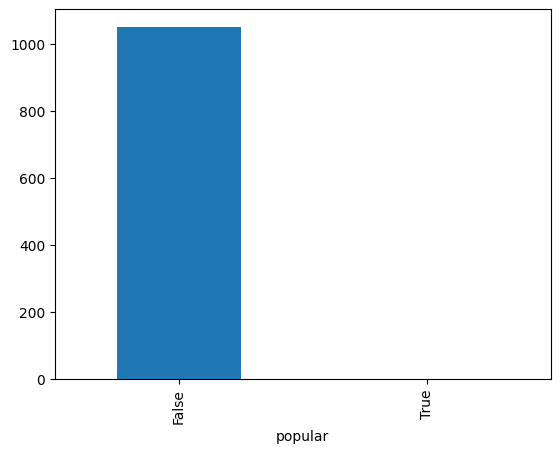

In [77]:
cantidad_populares.plot(kind="bar")

<Axes: xlabel='stars_count', ylabel='forks_count'>

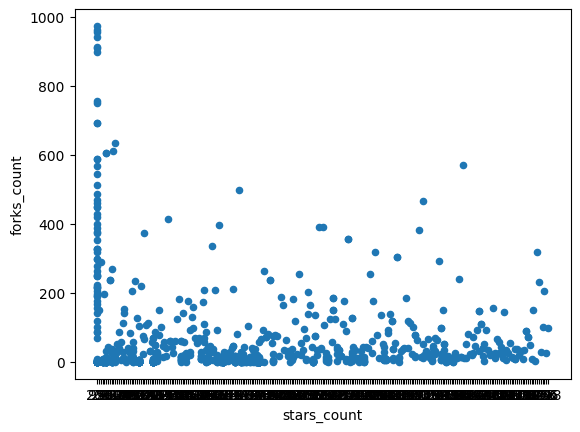

In [78]:
df.plot(kind="scatter", x="stars_count", y="forks_count")

### Exportar dataframe

Se puede exportar el dataframe a un archivo CSV con `df.to_csv("dataframe.csv")`.

Se puede exportar el dataframe a un archivo JSON con `df.to_json("dataframe.json")`.

Se puede exportar el dataframe a un archivo Excel con `df.to_excel("dataframe.xlsx")`.

